# Forest Fire Simulation in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt 



In [2]:
def neighbours(A, i, j):
    # calculate number of neighbours of A[i,j] that are infected
    nbrs = 0
    rows, cols = A.shape
    
    # sum across row i - 1
    if i > 0:
        if j > 0: nbrs += (A[i-1, j-1] == 1)
        nbrs += (A[i-1, j] == 1)
        if j < cols - 1: nbrs += (A[i-1, j+1] == 1)
    
    # sum across row i
    if j > 0: nbrs += (A[i, j-1] == 1)
    nbrs += (A[i, j] == 1)
    if j < cols - 1: nbrs += (A[i, j+1] == 1)
    
    # sum across row i + 1
    if i < rows - 1:
        if j > 0: nbrs += (A[i+1, j-1] == 1)
        nbrs += (A[i+1, j] == 1)
        if j < cols - 1: nbrs += (A[i+1, j+1] == 1)
    
    return nbrs

In [3]:
def forest_fire_plot(X):
    # plot infected and removed individuals
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if X[i, j] == 1:
                plt.scatter(i, j, color='red')
            elif X[i, j] == 0:
                plt.scatter(i, j, color='grey')

In [14]:
def sir_graph(susceptible_counts, infected_counts, removed_counts, alpha, beta):
    plt.figure()
    plt.plot(susceptible_counts, label="Susceptible", color="blue")
    plt.plot(infected_counts, label='Infected', color='red')
    plt.plot(removed_counts, label='Removed', color='grey')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Trees')
    plt.legend()
    plt.title(f'SIR Dynamics over Time with Alpha: {alpha} & Beta: {beta}')
    plt.grid(True)
    plt.savefig('SirGraph.png', dpi=600)
    plt.show()
    

In [27]:
def forest_fire(X, a=0.2, b=0.4, pausing=False):
    # simulate forest fire epidemic model
    # X[i, j] = 2 for susceptible; 1 for infected; 0 for removed
    plt.figure()
    plt.xlim(0, X.shape[0])
    plt.ylim(0, X.shape[1])
    forest_fire_plot(X)
    plt.show()

    # added Sir model 
    susceptible_counts = []
    infected_counts = []
    removed_counts = []

    # main loop
    burning = True
    while burning:
        burning = False

        susceptible_count = np.sum(X == 2)
        infected_count = np.sum(X == 1)
        removed_count = np.sum(X == 0)

        susceptible_counts.append(susceptible_count)
        infected_counts.append(infected_count)
        removed_counts.append(removed_count)

        # check if pausing between updates
        if pausing:
            input("Hit any key to continue")

        
        # update
        B = X.copy()
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                if X[i, j] == 2:
                    if np.random.rand() > (1 - a)**neighbours(X, i, j):
                        B[i, j] = 1
                elif X[i, j] == 1:
                    burning = True
                    if np.random.rand() < b:
                        B[i, j] = 0
        
        X = B
        plt.figure()
        plt.xlim(0, X.shape[0])
        plt.ylim(0, X.shape[1])
        forest_fire_plot(X)
        plt.show()

    sir_graph(susceptible_counts, infected_counts, removed_counts, alpha=a, beta=b)
    return X

Enter alpha probability for infection rate (in range 0.0 to 1.0):  0.2


Alpha: 0.2


Enter beta probability for removal (in range 0.0 to 1.0):  0.4


Beta: 0.4


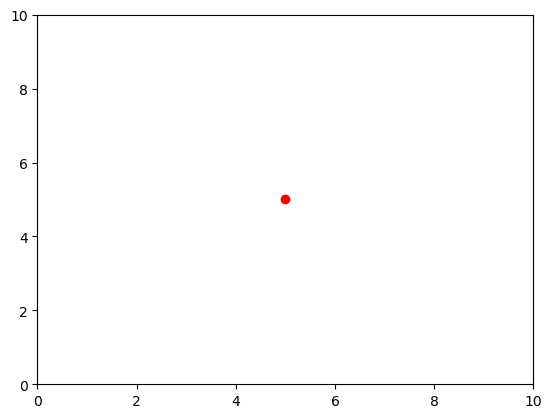

Hit any key to continue 


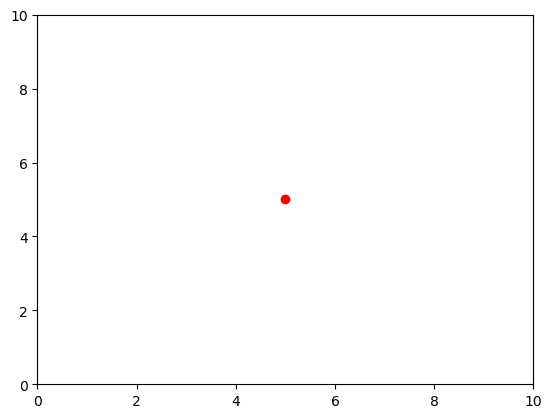

Hit any key to continue 


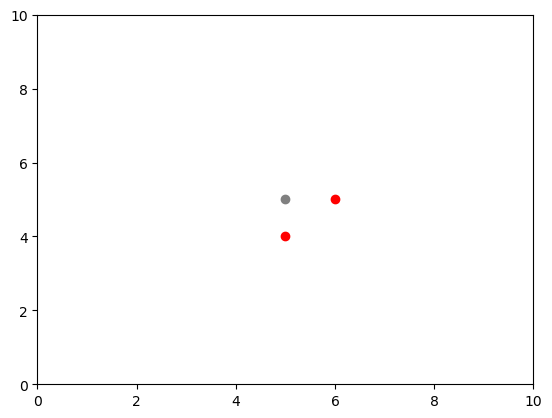

Hit any key to continue 


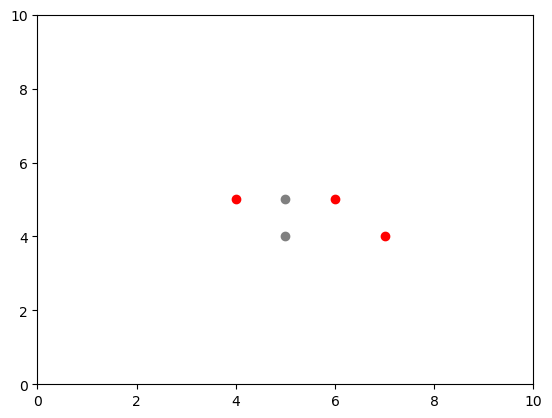

Hit any key to continue 


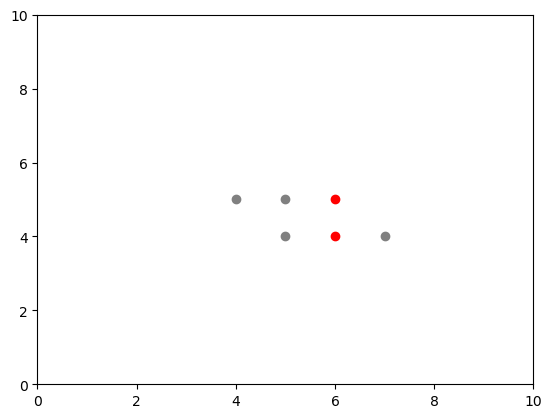

Hit any key to continue 


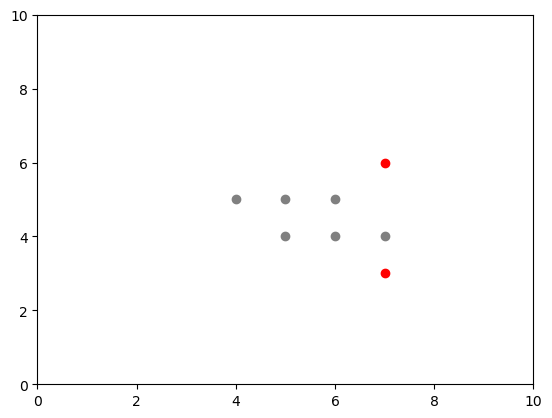

Hit any key to continue 


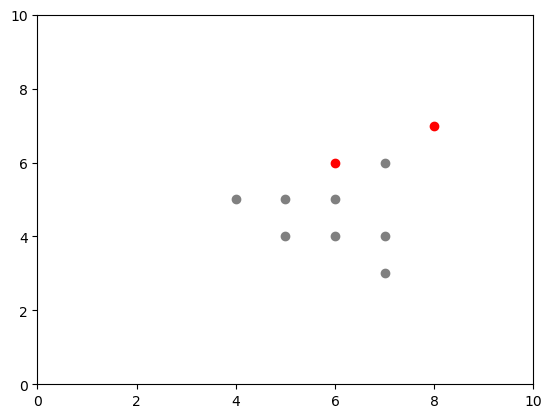

Hit any key to continue 


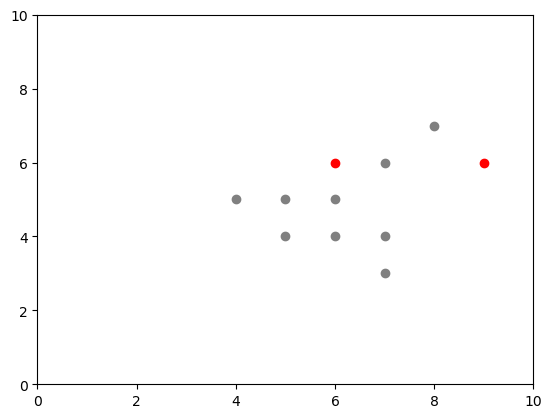

Hit any key to continue 


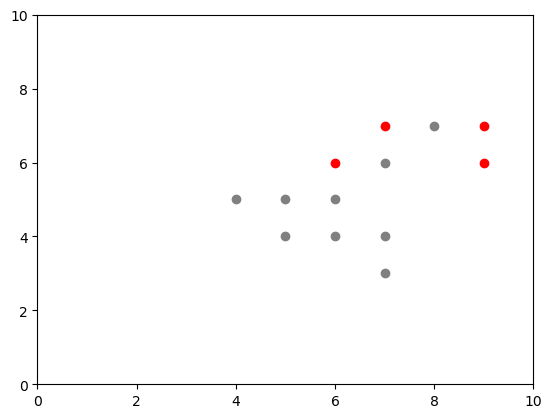

Hit any key to continue 


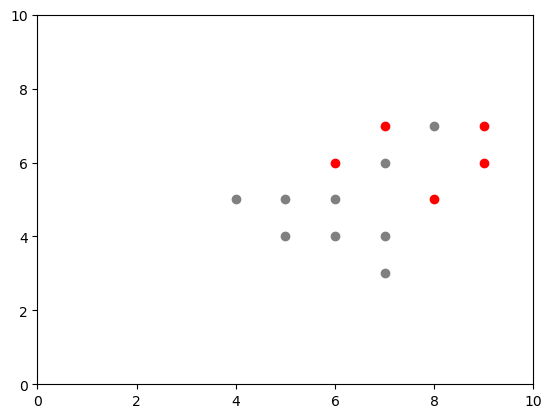

Hit any key to continue 


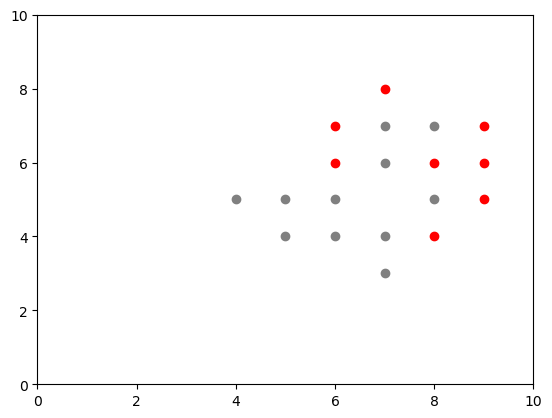

Hit any key to continue 


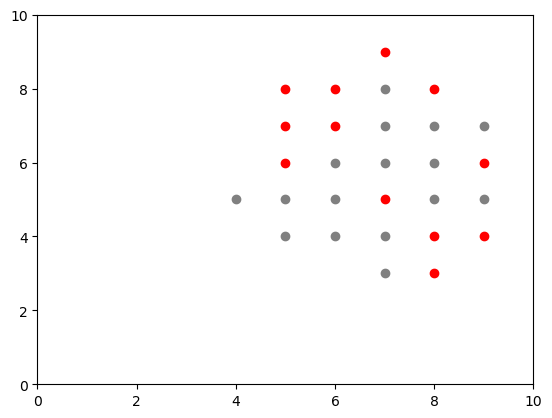

Hit any key to continue 


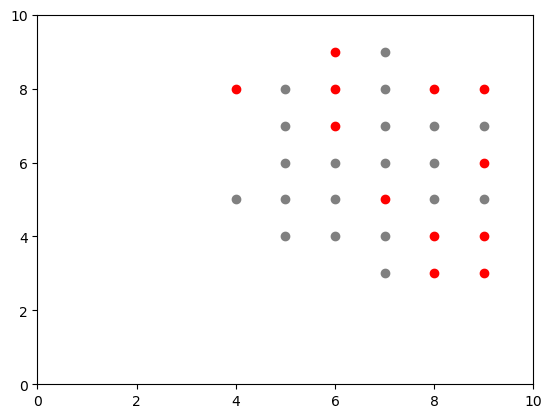

Hit any key to continue 


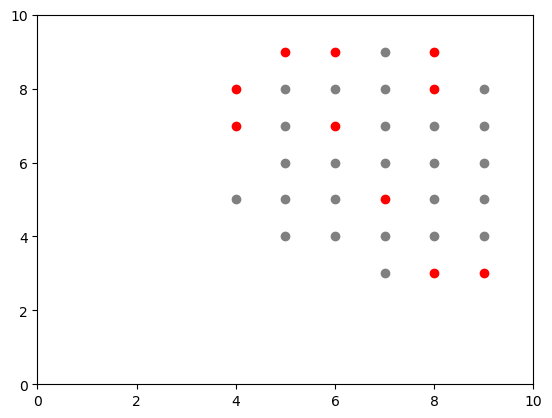

Hit any key to continue 


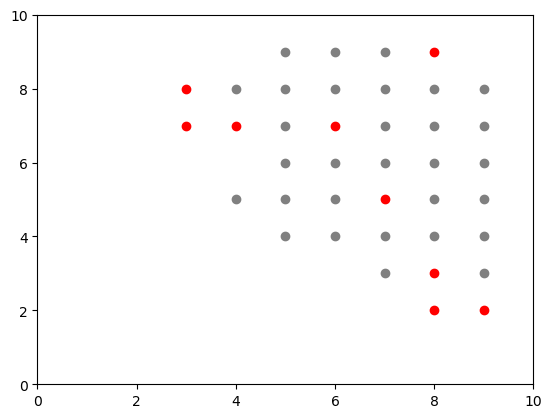

Hit any key to continue 


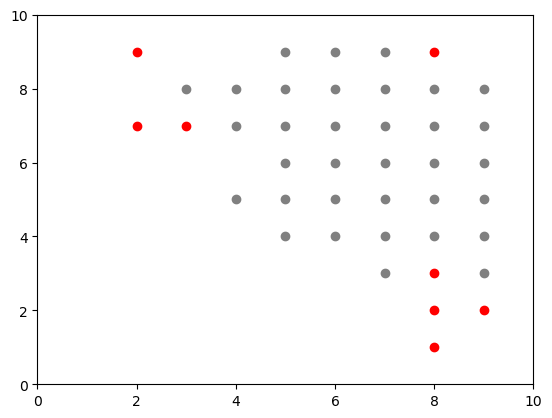

Hit any key to continue 


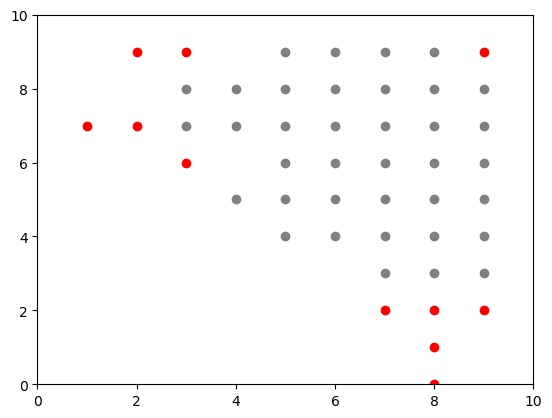

Hit any key to continue 


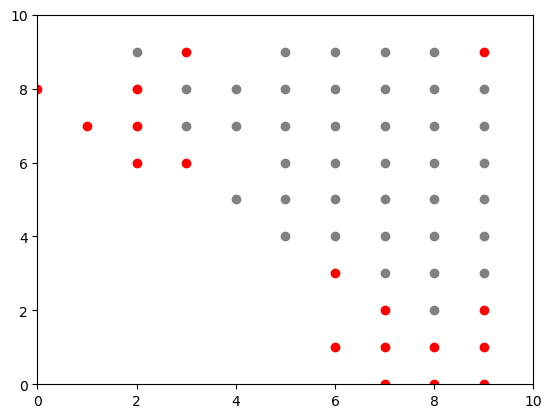

Hit any key to continue 


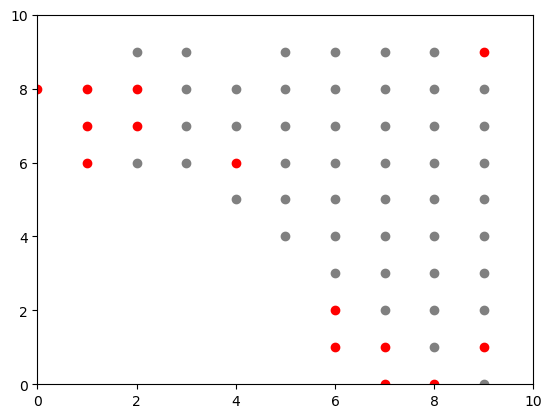

Hit any key to continue 


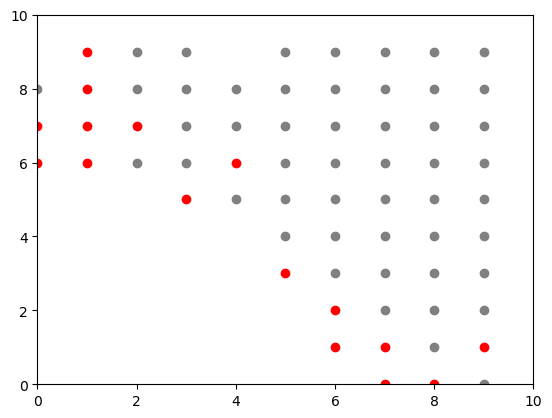

Hit any key to continue 


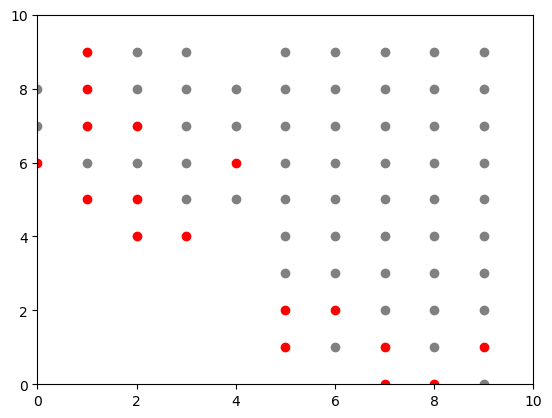

Hit any key to continue 


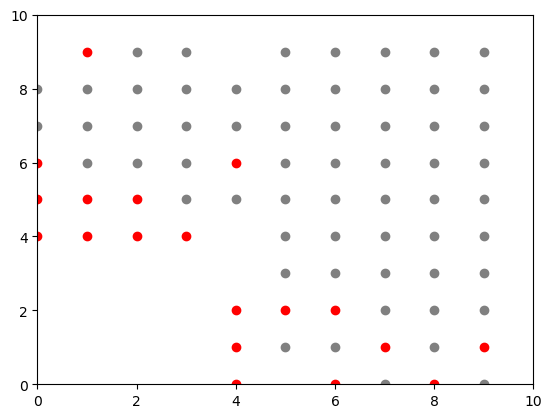

Hit any key to continue 


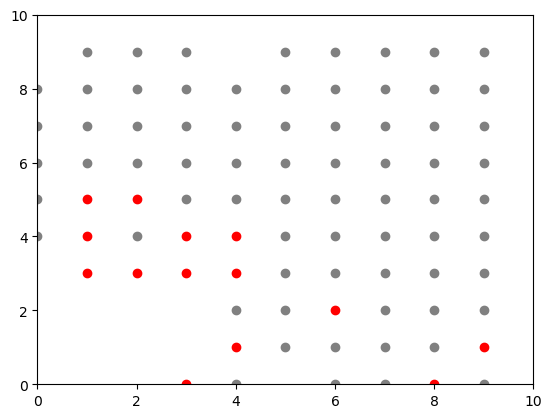

Hit any key to continue 


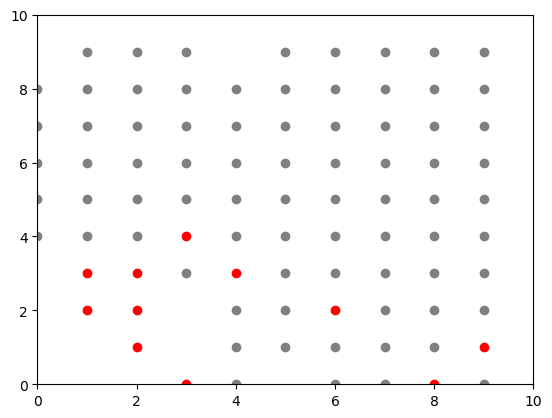

Hit any key to continue 


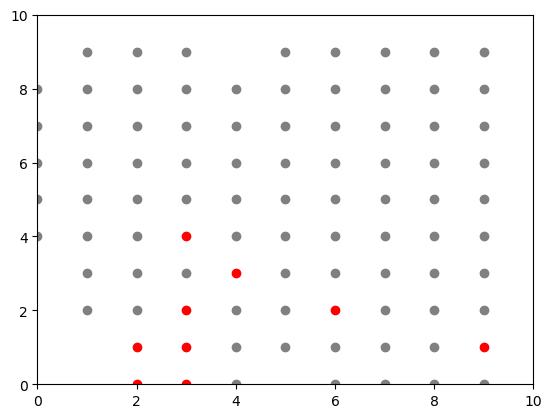

Hit any key to continue 


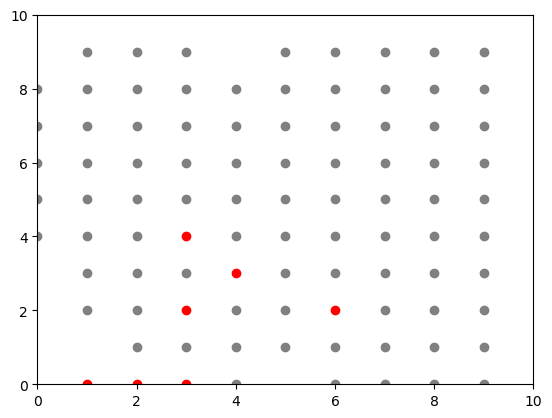

Hit any key to continue 


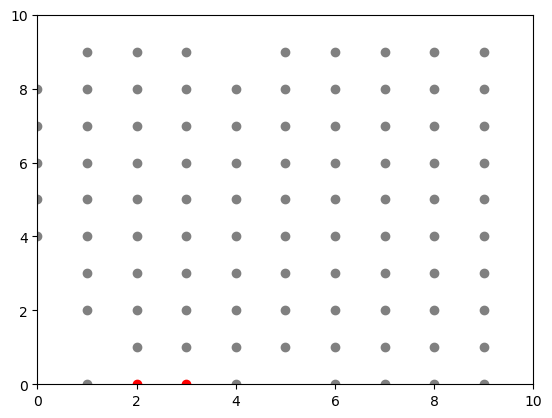

Hit any key to continue 


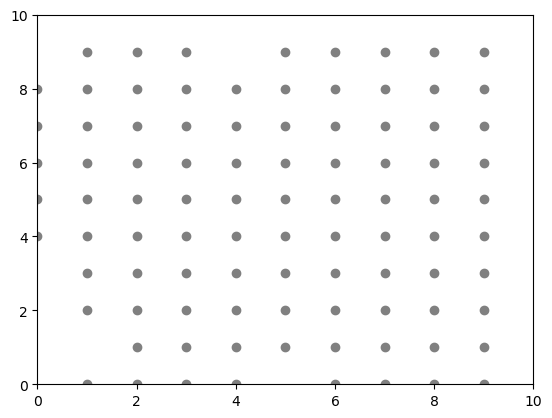

Hit any key to continue 


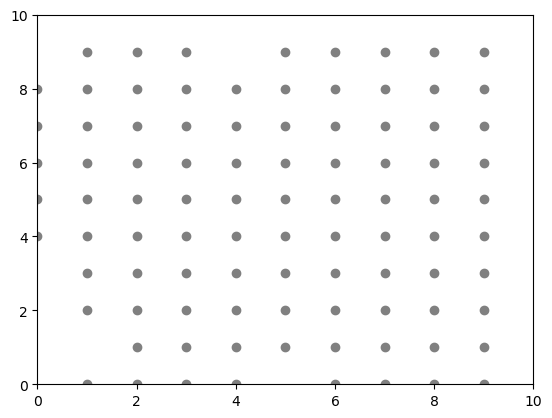

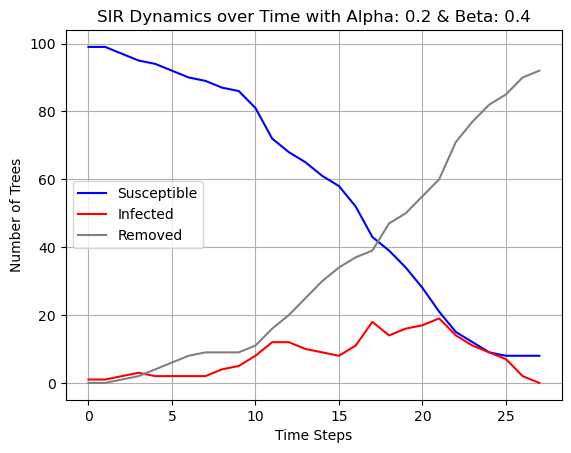

In [28]:
# Initialization 

susceptible_tree = 2
infected_tree = 1
removed_tree = 0

matrix_shape = (10, 10)

np.random.seed(42)
matrix = np.full(shape=matrix_shape, fill_value = susceptible_tree) 
matrix[5, 5] = infected_tree # start with one infected tree 

alpha_infection_prob = float(input("Enter alpha probability for infection rate (in range 0.0 to 1.0): "))
print(f"Alpha: {alpha_infection_prob}")

beta_infection_prob = float(input("Enter beta probability for removal (in range 0.0 to 1.0): "))
print(f"Beta: {beta_infection_prob}")

X = forest_fire(matrix, alpha_infection_prob, beta_infection_prob, True)